# **Lab 5 - Модель линейной регресии на датасете о размерах рыб**

In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Описание датасета:**
- `Species` - вид рыбы
- `Weight` 	- вес рыбы
- `Length1`	- измерение длины части 1 рыбы
- `Length2`	- измерение длины части 2 рыбы
- `Length3`	- измерение длины части 3 рыбы
- `Height`	- высота рыбы
- `Width` - ширина рыбы



⏳ Задание: **построить регрессионную модель предсказывающую вес `Weight` рыбы по ее другим параметрам.**

**Оценка работы:**
- Модель не построена или имеет отрицательный перфоманс - 0 баллов
- Модель построена, но недообучена или переобучена - 1 балл
- Модель построена и обучена. Перфоманс модели ниже 0.7  - 3 балла
- Модель построена и обучена. Перфоманс модели ниже 0.8, но выше 0.7  - 5 балла
- Модель построена и обучена. Перфоманс модели ниже 0.9, но выше 0.8  - 7 балла
- Модель построена и обучена. Перфоманс модели выще 0.9  - 10 баллов

В качестве метрик использовать $R^2$ и $RMSE$

оценка работы произвоится по $R^2$

In [458]:
df = pd.read_csv('./data/fish_dataset.csv')
target = 'Weight'
df

,Weight,Length1,Length2,Length3,Height,Width,Species
0,150.000000,20.400000,22.000000,24.700000,5.804500,3.754400,Roach
1,250.000000,25.400000,27.500000,28.900000,7.282800,4.566200,Perch
2,430.000000,26.500000,29.000000,34.000000,12.444000,5.134000,Bream
3,925.000000,36.200000,39.500000,45.300000,18.754200,6.749700,Bream
4,110.000000,19.000000,21.000000,22.500000,5.692500,3.555000,Perch
...,...,...,...,...,...,...,...
289,613.042973,29.960859,32.517046,35.573233,11.029767,6.565259,Whitefish
290,908.539217,35.653706,38.353706,41.716515,12.082910,6.547225,Whitefish
291,270.000000,23.670462,26.070462,28.784555,8.347283,4.247727,Whitefish
292,748.571215,32.671424,35.331864,38.492303,11.559995,6.571305,Whitefish


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   294 non-null    float64
 1   Length1  294 non-null    float64
 2   Length2  294 non-null    float64
 3   Length3  294 non-null    float64
 4   Height   294 non-null    float64
 5   Width    294 non-null    float64
 6   Species  294 non-null    object 
dtypes: float64(6), object(1)
memory usage: 16.2+ KB


In [460]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,348.766712,25.028487,27.046621,29.801124,8.327700,4.119812
std,318.212618,9.914202,10.675384,11.468998,3.991021,1.729552
min,0.000000,7.500000,8.400000,8.800000,1.738800,1.047600
25%,99.710615,18.512013,20.162228,22.500000,5.888248,3.199216
50%,270.000000,24.001394,26.260038,29.191205,7.806200,4.144000
75%,539.349484,32.595636,35.210664,38.757005,11.136600,5.247507
max,1550.000000,56.000000,60.000000,64.000000,18.957000,8.142000


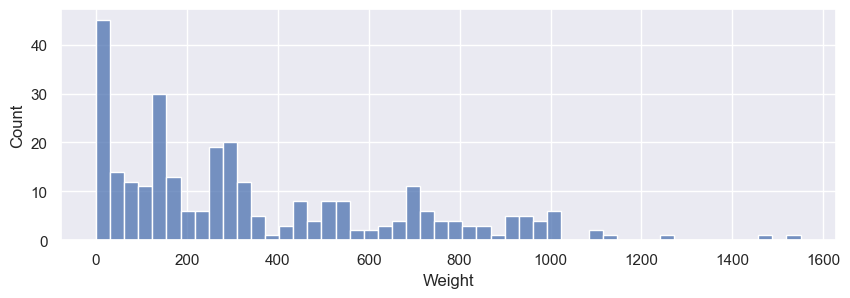

In [461]:
sns.set(rc={'figure.figsize': (10,3)})
sns.histplot(df[target], bins=50)
plt.show()

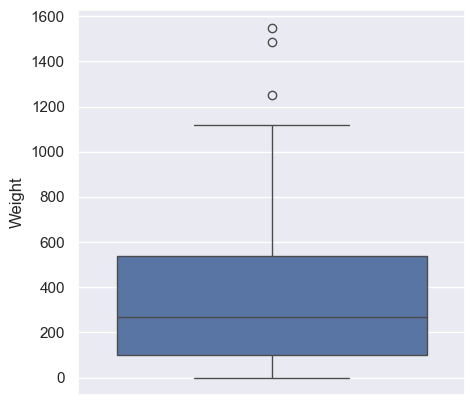

In [462]:
sns.set(rc={'figure.figsize': (5,5)})
sns.boxplot(df[target])
plt.show()

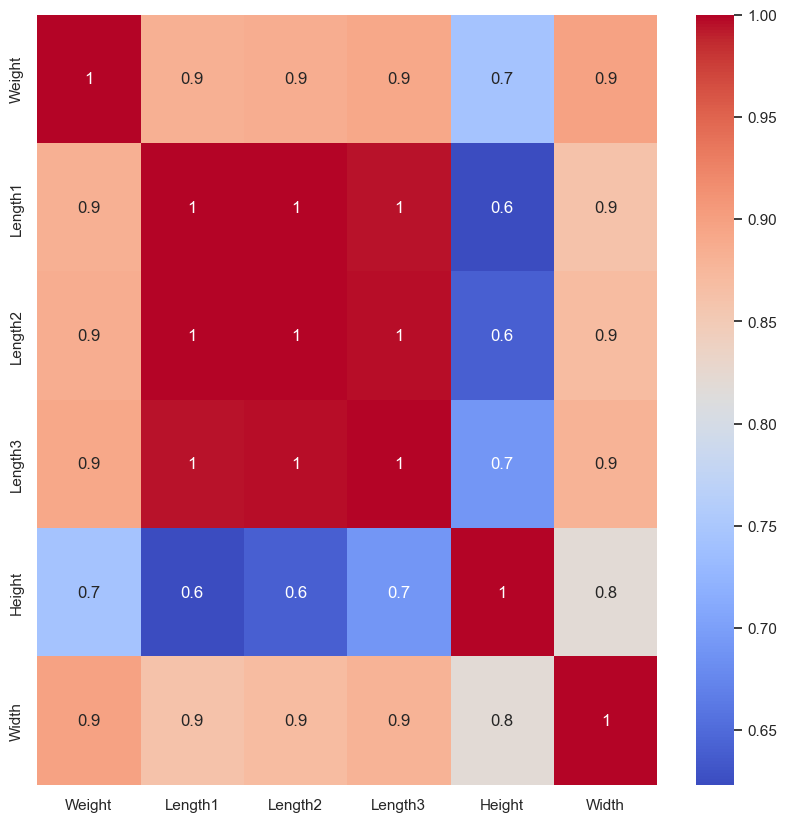

In [463]:
df1 = df[['Weight','Length1','Length2','Length3','Height','Width']]
sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.1g')
plt.show()

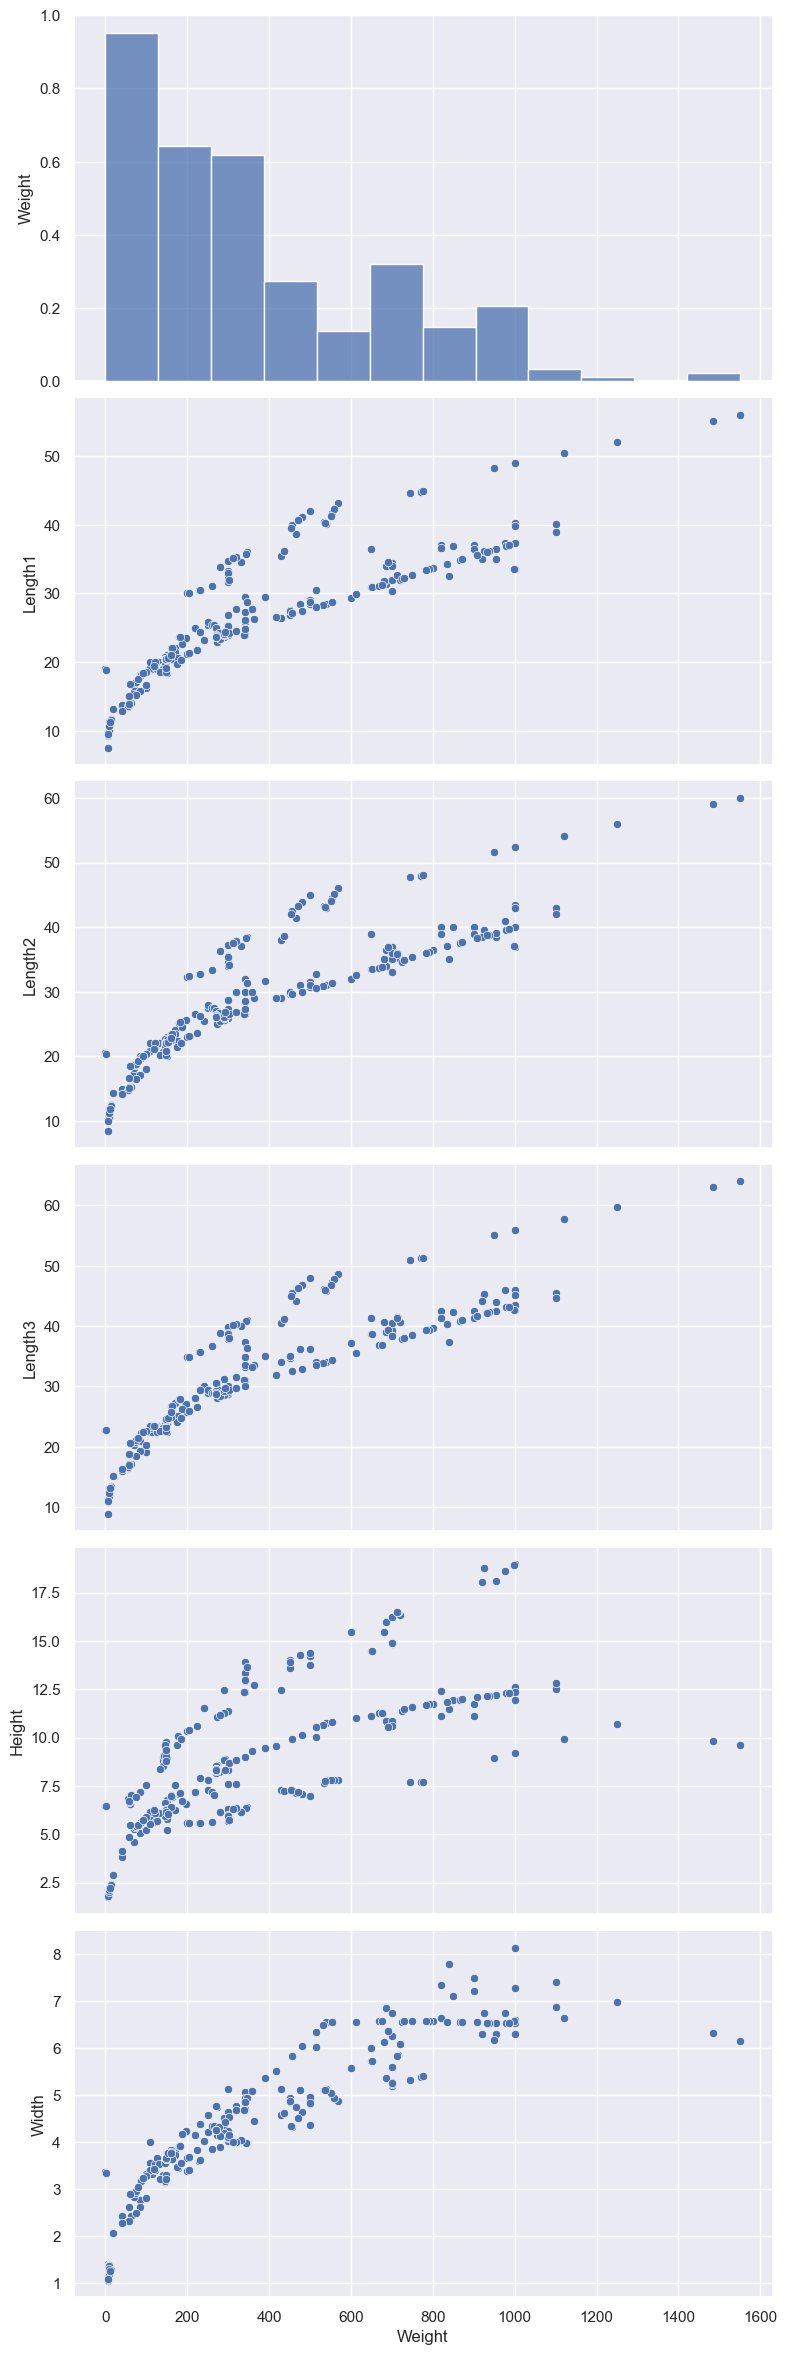

In [464]:
sns.pairplot(df, x_vars=[target], height=4, aspect=2)
plt.show()

In [465]:
df1 = df1[df1[target] < 1120.4164]
df1 = df1.drop(columns=['Length2','Length3'],  axis=1)
df1 = df1[df1['Weight'] > 0]
df1



,Weight,Length1,Height,Width
0,150.000000,20.400000,5.804500,3.754400
1,250.000000,25.400000,7.282800,4.566200
2,430.000000,26.500000,12.444000,5.134000
3,925.000000,36.200000,18.754200,6.749700
4,110.000000,19.000000,5.692500,3.555000
...,...,...,...,...
289,613.042973,29.960859,11.029767,6.565259
290,908.539217,35.653706,12.082910,6.547225
291,270.000000,23.670462,8.347283,4.247727
292,748.571215,32.671424,11.559995,6.571305


In [466]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


X = df1.drop(target, axis=1) # наблюдения по признакам
y = df1[target] # метки

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [468]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((231, 3), (58, 3), (231,), (58,))

In [469]:
poly = PolynomialFeatures(degree=3)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [470]:
from sklearn.linear_model import Lasso, Ridge

# model = LinearRegression()
# model = Lasso(alpha=0.3)
model = Ridge(alpha=0.7)

In [471]:
model.fit(X_train, y_train)

Ridge(alpha=0.7)

In [472]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [473]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f'R2 train: {r2_train}')
print(f'R2 test: {r2_test}')
print(f'MSE train: {mse_train}')
print(f'MSE test: {mse_test}')
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')
print(f'MAE train: {mae_train}')
print(f'MAE test: {mae_test}')

R2 train: 0.9846901777163092
R2 test: 0.9671481548382584
MSE train: 1365.8846901011054
MSE test: 2689.8657921623217
RMSE train: 36.95787724019205
RMSE test: 51.86391608972776
MAE train: 22.803431975916073
MAE test: 29.104466517039455
